In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load dataset

In [36]:
np.random.seed(42)

In [37]:
df = pd.read_csv("dataset_phishing.csv")
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [39]:
df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

Convert target label to 0 and 1

In [40]:
label = {'legitimate': 0, 'phishing': 1}
df['status'] = df['status'].map(label)

In [41]:
df['status'].value_counts()

status
0    5715
1    5715
Name: count, dtype: int64

Compute correlation matrix to identify relevant features

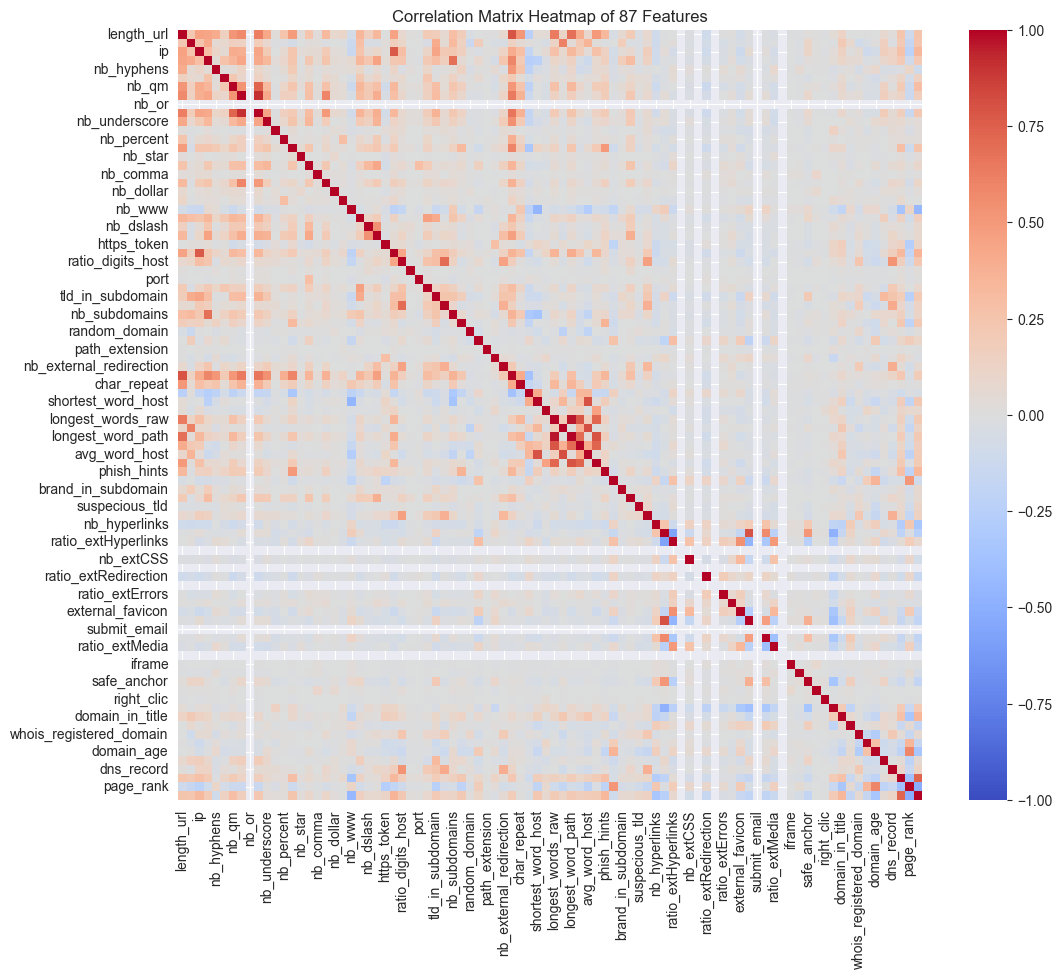

In [42]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, center=0, annot=False, fmt=".2f")
plt.title('Correlation Matrix Heatmap of 87 Features')
plt.show()

In [43]:
target = correlation_matrix['status']
target

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [44]:
threshold = 0.1
features = target[abs(target) > threshold].index.tolist()
features

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_hyphens',
 'nb_at',
 'nb_qm',
 'nb_and',
 'nb_eq',
 'nb_slash',
 'nb_semicolumn',
 'nb_www',
 'nb_com',
 'https_token',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'abnormal_subdomain',
 'nb_subdomains',
 'prefix_suffix',
 'shortening_service',
 'length_words_raw',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'suspecious_tld',
 'statistical_report',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'ratio_extRedirection',
 'external_favicon',
 'links_in_tags',
 'ratio_intMedia',
 'ratio_extMedia',
 'safe_anchor',
 'empty_title',
 'domain_in_title',
 'domain_with_copyright',
 'domain_registration_length',
 'domain_age',
 'dns_record',
 'google_index',
 'page_rank',
 'status']

Use the relevant features and split into train and test data

In [45]:
X = df[features]
X = X.drop('status', axis = 1)
y = df['status']
X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_slash,...,ratio_extMedia,safe_anchor,empty_title,domain_in_title,domain_with_copyright,domain_registration_length,domain_age,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,3,...,0.000000,0.0,0,0,1,45,-1,1,1,4
1,77,23,1,1,0,0,0,0,0,5,...,20.000000,100.0,0,1,0,77,5767,0,1,2
2,126,50,1,4,1,0,1,2,3,5,...,0.000000,100.0,0,1,0,14,4004,0,1,0
3,18,11,0,2,0,0,0,0,0,2,...,3.571429,62.5,0,1,0,62,-1,0,0,3
4,55,15,0,2,2,0,0,0,0,5,...,100.000000,0.0,0,0,1,224,8175,0,0,6


In [46]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: status, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

Scale data using Standard Scaler

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

SVM

In [49]:
svm = SVC(random_state=42)
svm.fit(X_train_scaled,y_train)

SVC(random_state=42)

In [50]:
svm_predict = svm.predict(X_test_scaled)

In [51]:
accuracy = accuracy_score(y_test,svm_predict)
accuracy

0.9654418197725284

Random Forest

In [52]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [53]:
rf_predict = rf.predict(X_test_scaled)

In [54]:
accuracy = accuracy_score(y_test, rf_predict)
f1 = f1_score(y_test, rf_predict)
confusion_mat = confusion_matrix(y_test, rf_predict)

print(f'Accuracy: {accuracy}')
print(f'F1: {f1}')
print(f'Confusion matrix: {confusion_mat}')

Accuracy: 0.9636920384951881
F1: 0.9629629629629629
Confusion matrix: [[1124   33]
 [  50 1079]]


Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree = tree.fit(X_train_scaled, y_train)
tree_pred = tree.predict(X_test_scaled)
accuracy = accuracy_score(y_test, tree_pred)
recall = recall_score(y_test, tree_pred)
precision = precision_score(y_test, tree_pred)
f1 = f1_score(y_test, tree_pred)
print(f'Accuracy {accuracy} precision-{precision} recall- {recall} f1-{f1}')

Accuracy 0.9041994750656168 precision-0.9121376811594203 recall- 0.8919397697077059 f1-0.9019256605463501


KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, knn_pred )
recall = recall_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)
print(f'Accuracy {accuracy} precision-{precision} recall- {recall} f1-{f1}')

Accuracy 0.9510061242344707 precision-0.9643835616438357 recall- 0.9353410097431355 f1-0.9496402877697842


XGB

In [57]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
importance = xgb.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
top_features = feature_importance.nlargest(30, 'Importance')['Feature'].values

xgb.fit(X_train[top_features],y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
xgb_predict = xgb.predict(X_test[top_features])

In [59]:
xgb_accuracy = accuracy_score(y_test,xgb_predict)
xgb_f1 = f1_score(y_test,xgb_predict)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predict)

print(f'Accuracy: {xgb_accuracy}')
print(f'F1: {xgb_f1}')
print(f'Confusion matrix: {xgb_conf_matrix}')

Accuracy: 0.9658792650918635
F1: 0.9654561558901683
Confusion matrix: [[1118   39]
 [  39 1090]]


Metrics

In [60]:
from sklearn.metrics import precision_score, recall_score

evaluation_metrics = {
    'Accuracy': {},
    'Precision': {},
    'Recall': {},
    'F1': {},
    'TPR': {},
    'TNR': {},
    'FPR': {},
    'FNR': {}
}

for model_name, predictions in [('Random Forest', rf_predict), ('XGBoost', xgb_predict), ('SVM', svm_predict), ('KNN', knn_pred), ('Decision Tree', tree_pred)]:
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    
    evaluation_metrics['Accuracy'][model_name] = round(accuracy_score(y_test, predictions), 4)
    evaluation_metrics['Precision'][model_name] = round(precision_score(y_test, predictions), 4)
    evaluation_metrics['Recall'][model_name] = round(recall_score(y_test, predictions), 4)
    evaluation_metrics['F1'][model_name] = round(f1_score(y_test, predictions), 4)
    evaluation_metrics['TPR'][model_name] = round(tp / (tp + fn), 4) if (tp + fn) != 0 else 0
    evaluation_metrics['TNR'][model_name] = round(tn / (tn + fp), 4) if (tn + fp) != 0 else 0
    evaluation_metrics['FPR'][model_name] = round(fp / (fp + tn), 4) if (fp + tn) != 0 else 0
    evaluation_metrics['FNR'][model_name] = round(fn / (fn + tp), 4) if (fn + tp) != 0 else 0

evaluation_df = pd.DataFrame(evaluation_metrics)
evaluation_df.reset_index(inplace=True)
evaluation_df.rename(columns={'index': 'Model'}, inplace=True)
evaluation_df

,Model,Accuracy,Precision,Recall,F1,TPR,TNR,FPR,FNR
0,Random Forest,0.9637,0.9703,0.9557,0.9630,0.9557,0.9715,0.0285,0.0443
1,XGBoost,0.9659,0.9655,0.9655,0.9655,0.9655,0.9663,0.0337,0.0345
2,SVM,0.9654,0.9679,0.9619,0.9649,0.9619,0.9689,0.0311,0.0381
3,KNN,0.9510,0.9644,0.9353,0.9496,0.9353,0.9663,0.0337,0.0647
4,Decision Tree,0.9042,0.9121,0.8919,0.9019,0.8919,0.9162,0.0838,0.1081


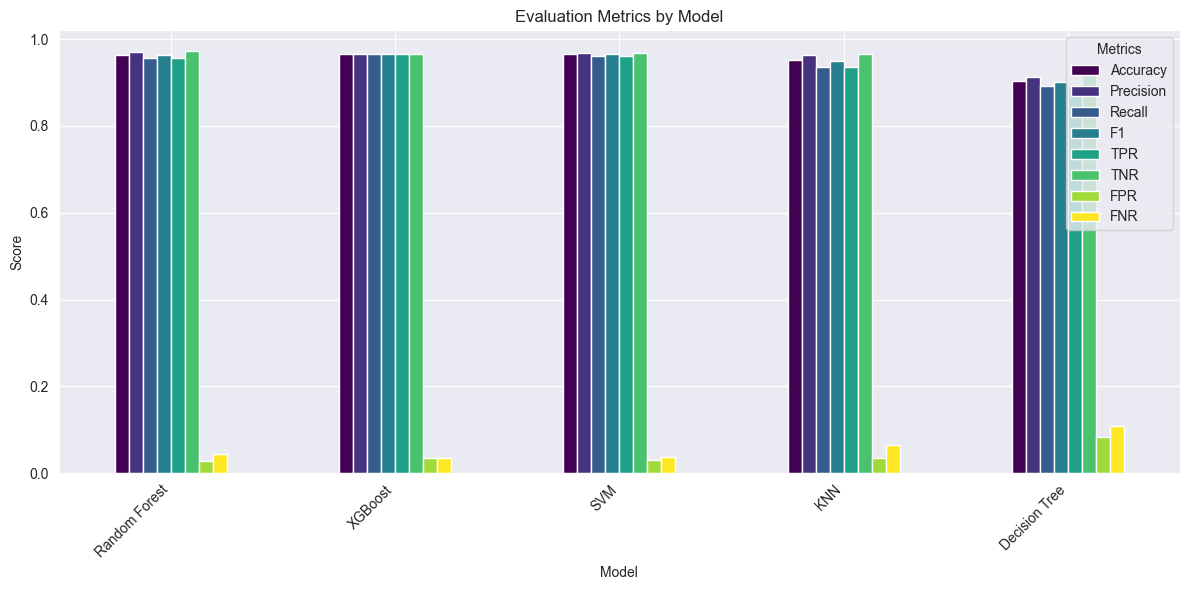

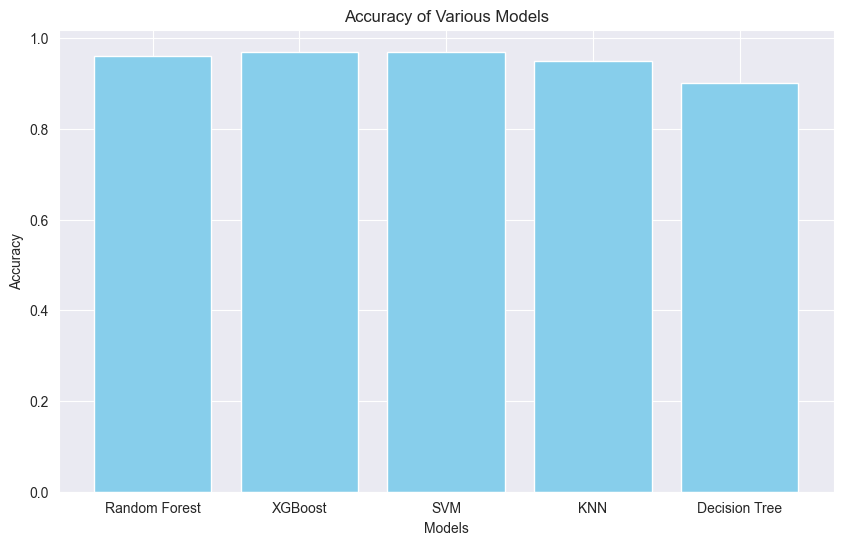

In [61]:
evaluation_df.set_index('Model', inplace=True)

evaluation_df.plot(kind='bar', figsize=(12, 6), cmap='viridis')
plt.title('Evaluation Metrics by Model')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

models = ['Random Forest', 'XGBoost', 'SVM', 'KNN', 'Decision Tree']
accuracy_scores = [round(accuracy_score(y_test,rf_predict), 2), round(accuracy_score(y_test,xgb_predict), 2), round(accuracy_score(y_test,svm_predict), 2), round(accuracy_score(y_test,knn_pred), 2), round(accuracy_score(y_test,tree_pred), 2)]  
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')

plt.title('Accuracy of Various Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()

LIME

In [62]:
import lime.lime_tabular

In [63]:
import numpy as np

X_train_array = X_train[top_features].values
X_test_array = X_test[top_features].values
explainer = lime.lime_tabular.LimeTabularExplainer(X_train[top_features].values, mode='classification', class_names=['legitimate', 'phishing'], feature_names=X_train[top_features].columns)

def lime_explanations(instance_index):
    print(f'Url: {df.values[int(X_test.iloc[instance_index].name)][0]}')

    actual_class = 'phishing' if y_test.iloc[instance_index] == 1 else 'legitimate'
    predicted_probs = xgb.predict_proba(X_test_array)
    predicted_class_index = np.argmax(predicted_probs[instance_index])
    predicted_class = 'phishing' if xgb.classes_[predicted_class_index] == 1 else 'legitimate'
    print(f'Features: \n{X_test.iloc[instance_index]}')
    print(f'Actual Class: {actual_class}')
    print(f'Predicted Class: {predicted_class}') 
    explanation = explainer.explain_instance(X_test_array[instance_index], xgb.predict_proba, num_features=10)
    explanation.show_in_notebook()
    return explanation


In [64]:
explanation = lime_explanations(100)

Url: http://facebook.id128-sync.com/login.php
Features: 
length_url                     40.000000
length_hostname                23.000000
ip                              0.000000
nb_dots                         3.000000
nb_hyphens                      1.000000
nb_at                           0.000000
nb_qm                           0.000000
nb_and                          0.000000
nb_eq                           0.000000
nb_slash                        3.000000
nb_semicolumn                   0.000000
nb_www                          0.000000
nb_com                          0.000000
https_token                     1.000000
ratio_digits_url                0.075000
ratio_digits_host               0.130435
tld_in_subdomain                0.000000
abnormal_subdomain              0.000000
nb_subdomains                   3.000000
prefix_suffix                   1.000000
shortening_service              0.000000
length_words_raw                5.000000
shortest_word_host              4.000000


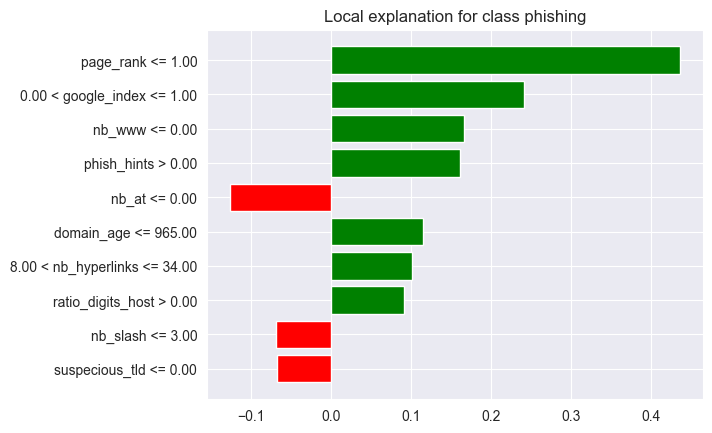

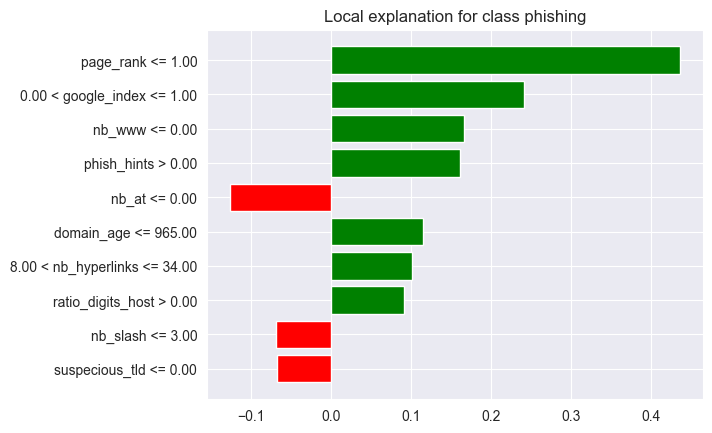

In [65]:
explanation.as_pyplot_figure()

In [66]:
explanation.as_list()

[('page_rank <= 1.00', 0.4366773970868482),
 ('0.00 < google_index <= 1.00', 0.2415372506116544),
 ('nb_www <= 0.00', 0.1658757182946067),
 ('phish_hints > 0.00', 0.16095189908402407),
 ('nb_at <= 0.00', -0.12721709988100482),
 ('domain_age <= 965.00', 0.11532631604121961),
 ('8.00 < nb_hyperlinks <= 34.00', 0.10124179843889494),
 ('ratio_digits_host > 0.00', 0.09058479118286272),
 ('nb_slash <= 3.00', -0.06962078940772709),
 ('suspecious_tld <= 0.00', -0.06808694469675151)]

In [67]:
exp = lime_explanations(101)

Url: https://www.maximaequisport.ru/
Features: 
length_url                      31.000000
length_hostname                 22.000000
ip                               0.000000
nb_dots                          2.000000
nb_hyphens                       0.000000
nb_at                            0.000000
nb_qm                            0.000000
nb_and                           0.000000
nb_eq                            0.000000
nb_slash                         3.000000
nb_semicolumn                    0.000000
nb_www                           1.000000
nb_com                           0.000000
https_token                      0.000000
ratio_digits_url                 0.000000
ratio_digits_host                0.000000
tld_in_subdomain                 0.000000
abnormal_subdomain               0.000000
nb_subdomains                    2.000000
prefix_suffix                    0.000000
shortening_service               0.000000
length_words_raw                 2.000000
shortest_word_host          

In [68]:
exp.as_list()

[('google_index <= 0.00', -0.23534262475052464),
 ('0.00 < nb_www <= 1.00', -0.18516452528410915),
 ('phish_hints <= 0.00', -0.18070467664222403),
 ('suspecious_tld <= 0.00', -0.1276789335706051),
 ('tld_in_subdomain <= 0.00', -0.11898683846305905),
 ('34.00 < nb_hyperlinks <= 101.00', -0.10906953273790643),
 ('nb_at <= 0.00', -0.10583810417219876),
 ('length_words_raw <= 2.00', -0.0956821690564224),
 ('nb_slash <= 3.00', -0.08540421818764735),
 ('longest_word_path <= 0.00', -0.08422833581714538)]

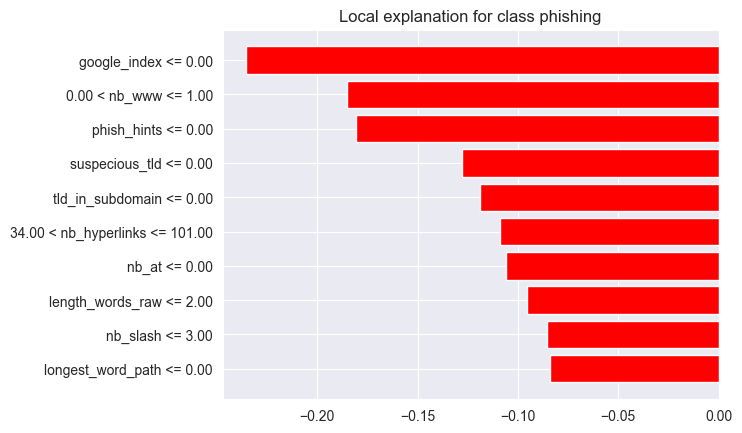

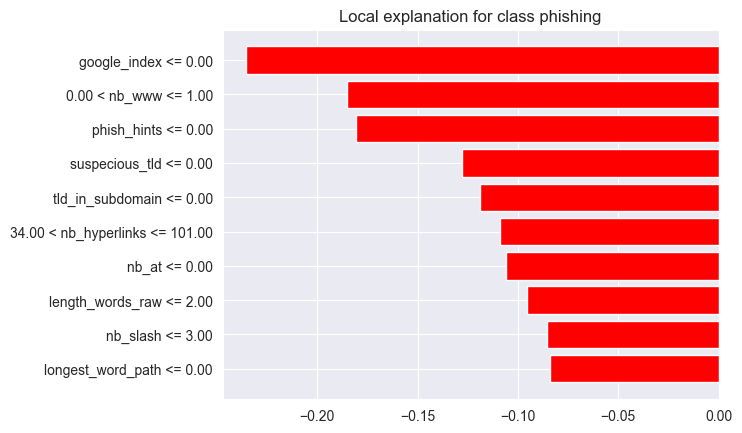

In [69]:
exp.as_pyplot_figure()